## 회귀분석이란?
#### 개념
- 관찰된 데이터에서 독립변수와 종속변수 사이의 관계를 설명하는 함수를 추정하고, 그 적합도를 평가하는 통계적 분석 방법
- 데이터는 종속변수 값이 포함된 label된 데이터셋이며, 사용자가 정한 함수(선형식 또는 비선형식)가 데이터를 잘 설명하도록 **추정(학습)**한다
- 종속변수의 정답(label)을 알고 모델을 적합시키므로 **지도학습(supervised learning)**의 한 종류

#### 사용예
- 특정한 값을 함수/모델로 예측하고자 하는 모든 분야에서 활용됨
- 단순: 키로 몸무게 예측하기 (1독립 - 1종속)
- 중간: 주택 가격 예측하기 (다변수 - 1종속) -> 하지만 이게 제일 어려울듯... (독립변수를 모두 정의할 수 없기 때문문)
- 복잡: kinetic model parameter 추정 (다변수 - 다종속 + ODE 기반 모델 설정 필요)

## 선형회귀분석이란?
#### 개념
- 종속변수 y와 독립변수들 사이의 관계를 parameter에 대해 선형이 형태로 모델링하는 회귀분석 방법
- 단순한 경우 y = ax + b와 같은 형태의 1차식을 사용용
- 독립적 변수가 여러 개일 경우우 다중선형회귀분석이라 하며, y = ax1 + bx2 + cx3 + d 와 같은 형태로 표현됨
- 변수 자체를 비선형화 시켜서 선형회귀분석도 가능함 y = ax1 + b(1/x1) + cx2 + dlog(x2) + e
- **중요 포인트** 모델이 선형인게 중요한게 아니라 parameter가 선형인게 중요함! -> y = ax^2 + bx + c도 선형회귀분석 가능

## scikit-learn과 scipy
#### 공통개념
- 과학, 수학, 데이터 분석을 위한 Python 생태계의 핵심 라이브러리
- 내부 연산에 numpy 배열을 사용하여 빠른 벡터, 행렬 연산을 지원함
- 복잡한 최적화, 보간, 통계, 머신러닝 방법들을 직접 구현할 필요 없이 제공함
#### 차이점
- Scipy는 과학, 수학, 엔지니어링 계산을 위한 라이브러리에 가까움 (ODE, 최적화, 신호처리, 통계에 활용됨)
- Scikit-Learn은 머신러닝 알고리즘을 제공하는 라이브러리에 가까움 (회귀, 분류, 군집, 모델 평가 등)
#### **회귀분석 방법의 차이**
##### SciPy
- 수학적 모델에 parameter를 맞추는 방식
- Nonlinear least squares 등
- 모델을 사용자가 직접 정의한 함수 형태가 되어야 함
- 이 parameter가 모델에 어떤 의미가 있는지 사전 지식이 필요함
- 대신 사용자가 지정한 함수의 파라미터를 자동으로 최적화하는 알고리즘이 구현되어 있음
##### Scikit-learn
- 머신러닝 모델 기반 회귀
- 선형, Lasso, Ridge, RandomForest 등
- 함수 형태를 지정할 필요가 없음 (할수는 있음, 하지만 주목적이 그게 아님)
- 대신 사용자가 지정한 함수를 구현하면 그 파라미터를 최적화하는 알고리즘을 직접 구현해야 함!
#### **결론: kinetic model 만들때는 Scipy를 이용하자**

Estimated parameters: a: 3.57, b: 6.68
True parameters: a: 3.50, b: 7.20


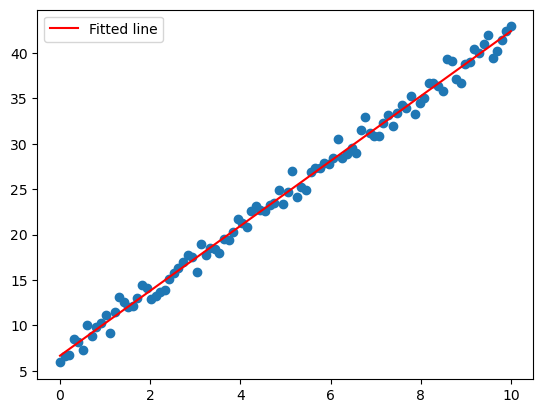

In [1]:
''' 단순선형회귀분석 예제 '''
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
df0 = pd.read_csv('example1.csv')

# Define model function
def linear_func(x, a, b): # Important! Function argument format matters.
    return a * x + b

# Estimate parameters
popt, _ = curve_fit(linear_func, df0['x'], df0['y'])
a_fit, b_fit = popt
print(f'Estimated parameters: a: {a_fit:.2f}, b: {b_fit:.2f}')
print(f'True parameters: a: {3.5:.2f}, b: {7.2:.2f}')

# Plotting
plt.scatter(df0['x'], df0['y'])
x_fit = np.linspace(df0['x'].min(), df0['x'].max(), 100)
y_fit = linear_func(x_fit, a_fit, b_fit)
plt.plot(x_fit, y_fit, color='red', label='Fitted line')
plt.legend()
plt.show()

## 실습1: 다중선형회귀분석 파라미터 찾기
주어진 데이터 ('workshop1_name.csv')를 활용해서 y = ax + bx^2 + c(1/x) + d의 파라미터를 추정하시오

Estimated parameters: a: 1.57, b: -0.21, c: 3.12, d: 9.97
Solution: a: 1.50, b: -0.20, c: 3.20, d: 10.00


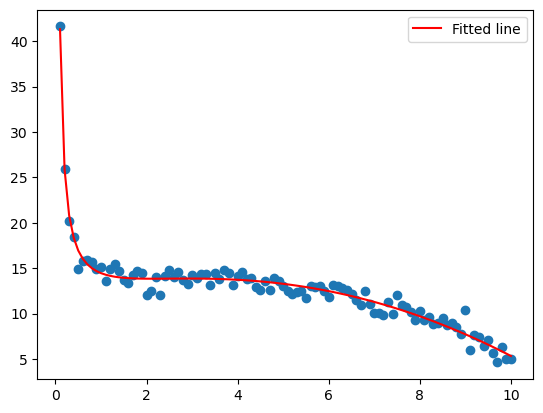

In [2]:
''' Workshop1 Solution '''
# Load data
df1 = pd.read_csv('workshop1_Sik.csv')

# Define multi-linear function
def multi_linear_func(x, a, b, c, d):
    return a * x + b * x**2 + c * (1/x) + d

# Estimate parameters
popt, _ = curve_fit(multi_linear_func, df1['x'], df1['y'])
a_fit, b_fit, c_fit, d_fit = popt
print(f'Estimated parameters: a: {a_fit:.2f}, b: {b_fit:.2f}, c: {c_fit:.2f}, d: {d_fit:.2f}')
print(f'Solution: a: {1.5:.2f}, b: {-0.2:.2f}, c: {3.2:.2f}, d: {10:.2f}')

# Plotting
plt.scatter(df1['x'], df1['y'])
x_fit = np.linspace(df1['x'].min(), df1['x'].max(), 100)
y_fit = multi_linear_func(x_fit, a_fit, b_fit, c_fit, d_fit)
plt.plot(x_fit, y_fit, color='red', label='Fitted line')
plt.legend()
plt.show()

## Scipy 최적화 지원 메소드
#### 개념
- Scipy는 다양한 최적화 메소드를 지원함
- scipy.optimize.least_squares : residual을 직접 정의해서 최소화하는 방법
    - 가장 많이 사용되는 방법
    - bounds 및 constraints 설정 가능
    - algorithm: Trust Region Reflective, **Levenberg-Marquardt** 등등
- scipy.optimize.minimize : 최소화하고 싶은 목적함수를 직접 지정함
    - 꼭 residual이 아니어도 사용 가능
    - algorithm: Nelder-Mead, BFGS, **L-BFGS-B** 등등
    - bounds 및 constraints 설정 가능
- scipy.optimize.curve_fit: 가장 쉬운 설정방법
    - least_squares를 수행하는건 동일
    - 함수만 넣으면 알아서 least_squares를 수행
- scipy.optimize.differential_evolution: 저도 안써봤는데 이번에 처음 알게됨
    - 비선형, non-convex 문제에서 local minimum을 회피함
    - 유전 알고리즘의 개량 버전 -> 완전 stochastic한 process를 연산과정에서 일부 guide를 주면서 수렴성을 개선
    - global searchdp 사용된다고 함 -> 저도 나중에 사용해보고 효과가 좋으면 계속 활용할 예정
- scipy.optimize.basinhopping : global + local optimization의 hybrid 형태
    - 일단 least_squares를 수행하고 그 지점에서 random step으로 옮겨보는 방법
    - 해당 메소드를 사용하진 않는데 자체 코드로 제가 가장 많이 활용하는 방법!
        - 사실 있는 줄 알았는데 뭔지 정확히 몰라서 직접 코드를 만들어서 썼었음... 앞으론 사용해볼 예정

## 비선형 회귀분석이란?
#### 개념
- 종속변수 y와 독립변수들 사이의 관계를 parameter에 대해 **비선형적인** 형태로 모델링하는 회귀분석 방법
- y = aexp(-b/x), y = {a(1-bx1/cx2)/(dx1+ex2+f)}와 같은 형태
- 변수 자체를 비선형화 시켜서 선형회귀로 표현이 불가능한 함수에 활용
- 선형회귀처럼 residual을 최소화하는 구조는 동일하지만, 비선형 회귀는 반드시 iterative 최적화 알고리즘이 사용되어야 함
    - 선형회귀에는 정답이 반드시 존재함: 선형대수적인 관점에서 반드시 solution이 있는 문제로 정의가 됨
        - 모든 파라미터를 동시에 최적화할 수 있는 수학적 알고리즘이 있음 (Normal equation)
        - y = Xb + e의 함수에 대해서 (X와 b는 각각 nxp, px1 벡터)
            - loss function은 L(b) = (y - Xb)^2 (residual의 제곱곱)
            - loss function을 미분하면 gradient 함수가 dL/db = -2X.T(y - Xb)
            - 최소값에서 gradient가 0이므로 X.T(y - Xb) = 0
            - 정리하면 X.T Xb = XT y (Normal equation)
            - 이걸 풀기 위해 역행렬을 곱하면 b.est = (X.T X)^-1 X.T y 로 analytic, explicit해를 구할 수 있음
    - 비선형회귀는 analytic한 정답을 구할 수 없음: 다음의 연산을 따름
        - parameter를 임의로 설정
        - residual을 계산
        - 개선 방향을 계산
        - 그 방향으로 parameter를 조금 이동해봄
        - 계산이 수렴될때까지 반복함 (tolerance)
            - tolerance는 3가지가 있음
            - xtol: parameter 변화의 크기
            - ftol: cost function의 변화 크기
            - gtol: gradient의 크기

Estimated parameters: a: 0.2096, b: 0.5705, c: 2.0256
True parameters: a: 0.2000, b: 0.5000, c: 2.0000


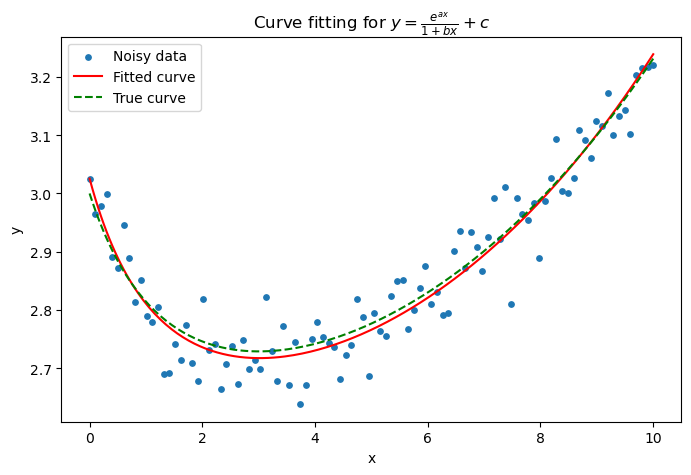

In [3]:
''' 단순비선형회귀분석 예제 '''

# Load data
df2 = pd.read_csv('example2.csv')

# Define model function
def model_func(x, a, b, c):
    return np.exp(a * x) / (1 + b * x) + c

# Estimate parameters
p0 = [0.1, 0.1, 0.1] # initial guess
bnds = ([0, 0, 0], [np.inf, np.inf, np.inf]) # bounds for all parameters
popt, _ = curve_fit(model_func, df2['x'], df2['y'], p0=p0, bounds=bnds)
#popt, _ = curve_fit(model_func, df2['x'], df2['y'])
a_fit, b_fit, c_fit = popt
print(f'Estimated parameters: a: {a_fit:.4f}, b: {b_fit:.4f}, c: {c_fit:.4f}')
print(f'True parameters: a: {0.2:.4f}, b: {0.5:.4f}, c: {2.0:.4f}')

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(df2['x'], df2['y'], label='Noisy data', s=15)
x_fit = np.linspace(0, 10, 200)
y_fit = model_func(x_fit, a_fit, b_fit, c_fit)
plt.plot(x_fit, y_fit, color='red', label='Fitted curve')
plt.plot(x_fit, model_func(x_fit, 0.2, 0.5, 2.0), color='green', linestyle='--', label='True curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve fitting for $y = \\frac{e^{ax}}{1+bx} + c$')
plt.show()

## 실습2: 다중비선형회귀분석 파라미터 찾기
주어진 데이터('workshop2_name.csv')를 활용해서 $y = \frac{a \exp(-b) x_1 x_2}{1 + c \exp(d) x_1 + e \exp(f) x_2}$ 의 파라미터를 추정하시오

Estimated parameters: a: 1.0107, b: 6.9353, c: 4.7700, d: 0.0712, e: 0.2129, f: 3.5124
True parameters: a: 3.0000, b: 2.0000, c: 3.0000, d: 5.0000, e: 4.0000, f: 5.0000


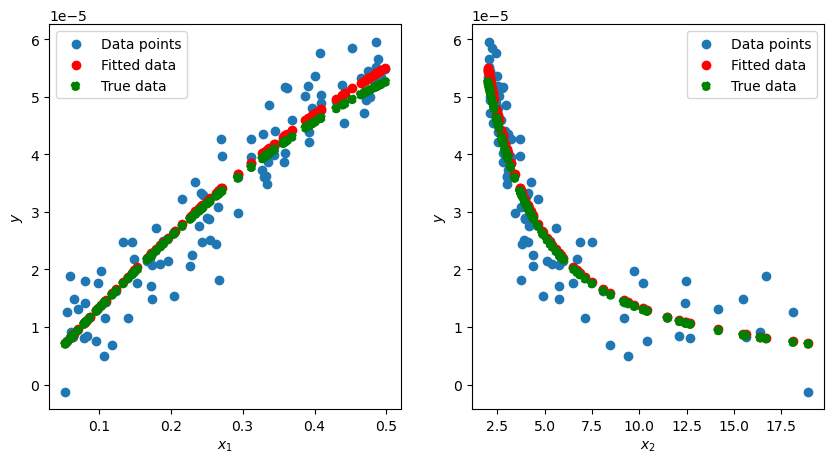

In [4]:
df3 = pd.read_csv('workshop2_Hwan.csv')

def fit_model(X, a, b, c, d, e, f):
    x1, x2 = X
    return a * np.exp(-b) * x1 * x2 / (1 + c * np.exp(d) * x1 + e * np.exp(f) * x2)

p0 = [1, 1, 1, 1, 1, 1]
bnds = ([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
#popt, _ = curve_fit(fit_model, (df3['x1'], df3['x2']), df3['y'])
popt, _ = curve_fit(fit_model, (df3['x1'], df3['x2']), df3['y'], p0=p0, bounds=bnds)
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = popt
print(f'Estimated parameters: a: {a_fit:.4f}, b: {b_fit:.4f}, c: {c_fit:.4f}, d: {d_fit:.4f}, e: {e_fit:.4f}, f: {f_fit:.4f}')
print(f'True parameters: a: {3:.4f}, b: {2:.4f}, c: {3:.4f}, d: {5:.4f}, e: {4:.4f}, f: {5:.4f}')

x1_fit = df3['x1']
x2_fit = df3['x2']
y1_fit = fit_model((x1_fit, x2_fit), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
y1_true = fit_model((x1_fit, x2_fit), 2, 4, 2, 5, 5, 4)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(x1_fit, df3['y'], label='Data points')
axs[1].scatter(x2_fit, df3['y'], label='Data points')
axs[0].scatter(x1_fit, y1_fit, color='red', label='Fitted data')
axs[1].scatter(x2_fit, y1_fit, color='red', label='Fitted data')
axs[0].scatter(x1_fit, y1_true, color='green', linestyle='--', label='True data')
axs[1].scatter(x2_fit, y1_true, color='green', linestyle='--', label='True data')
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$y$')
axs[1].set_xlabel('$x_2$')
axs[1].set_ylabel('$y$')
axs[0].legend()
axs[1].legend()
plt.show()

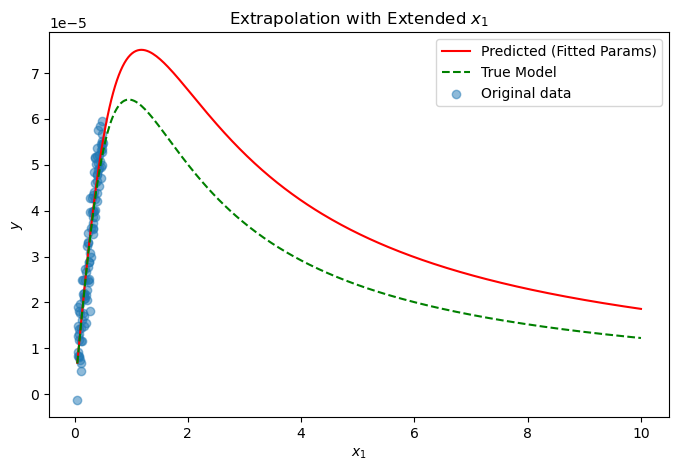

In [5]:
# The risks of extrapolation

x1_long = np.linspace(0.05, 10, 300)
x2_long = 1.0 / x1_long

y_pred_long = fit_model((x1_long, x2_long), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
y_true_long = fit_model((x1_long, x2_long), 2, 4, 2, 5, 5, 4)

plt.figure(figsize=(8, 5))
plt.plot(x1_long, y_pred_long, label='Predicted (Fitted Params)', color='red')
plt.plot(x1_long, y_true_long, label='True Model', color='green', linestyle='--')
plt.scatter(x1_fit, df3['y'], alpha=0.5, label='Original data')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.title('Extrapolation with Extended $x_1$')
plt.legend()
plt.show()

## kinetic 실험 데이터
#### 개념
- 미분반응기: 아주 적은 반응만 진행되어 반응기 내부의 성분별 농도 변화를 고정값으로 활용할 수 있는 실험
    - C_in - C_out ~ 0, but not 0
    - 이를 통해 순간반응속도를 "측정"할 수 있음
    - 이걸 할 수 있으면 비선형 회귀분석이 필요없음
    - 근데 실험을 잘 안해줌, 하기도 힘들고... (실험 조건 설정이 난이도가 매우 높음)
- 적분반응기: 일반적인 kinetic 실험결과
    - 반응이 충분히 일어나서 농도 변화가 큼: C_in - C_out >> 0
    - 하지만 isothermal 은 유지가 되는 조건에서 실험해야 함: 안해도 되는데 그럼 모델 함수가 굉장히 복잡해짐
    - 순간반응속도를 측정할 수 없기 때문에 반응속도식을 적분해서 모델화 해야함
        - Ordinary differential Equation을 시간 term 혹은 공간속도 term으로 "적분"하여 계산 (근데 fixed bed 실험도 보통 residence time 으로 환산해서 계산하는 경우가 일반적임, 등몰 반응이 아니면 난이도 급상승...)
    - 반응해석으로 밥먹고 살려면 평생 해야 할 일... 하지 마세요, 아니 저 대신 해주세요

## 적분 반응기 해석모델 구현 알고리즘
#### parameter regression process
1. 데이터 처리: 실험 데이터 (time vs C/N)을 정리하고 필요한 전처리를 수행
2. 실험별 조건 설정: 초기 농도, 온도, 유량 등 각 실험의 초기 조건 및 상수를 정의
3. ODE 기반 kinetic model 계산: 주어진 kinetic model을 활용해 ODE를 정의
4. 적분 solver가 농도/몰수 profile 계산: 지정된 시간 구간을 적분분
5. Residual 계산: 실험 데이터와 모델 예측값의 차이를 구해 목적함수를 평가 (보통 MSE)
6. Parameter 최적화 loop: 비선형 최적화 알고리즘이 residual을 줄이기 위해 parameter 업데이트 재수행
    - 4번의 ODE 적분 -> 5번의 Residual 연산이 반복 수행됨
7. Parameter Estimation 완료!
    - 필요시 초기값을 다르게 주어 6단계를 재수행하여 global optimum 탐색

## ODE 구성 (kinetic model 코드 개발의 핵심!!!!!!!!!!!!)
ODE는 일종의 0D Batch reactor simulator에 가깝다! (Aspen plus RCSTR 유닛을 직접 코딩하는 것과 유사)
완전 혼합을 가정한 homogeneous reactor 모델을 하나의 함수로 만드는 것 (복잡하려면 한없이 복잡해지는 이유... sad)
1. 현재 시점 t에서의 일때의 싱테 (농도, 몰수 등)을 불러옴
    - 각 성분별 농도/몰분율을 기반으로 해당 시간에서의 열역학 의존성 물성 계산 (필요 시)
2. kinetic model 정의
    - (essential) 농도/몰분율을 driving force term으로 변환 (농도는 그대로 사용하는 경우가 많고, 몰분율은 partial pressure난 fugacity, activity로 변환이 필요)
    - (essential) kinetic model parameter를 solver에서 정의한 값과 연동시켜서 매 iteration마다 계산할 수 있도록 수식화
3. Mass balance 계산
    - (essential) 각 성분별 농도/몰수변화량 dCdt or dNdt = {kinetic model1} + {kinetic model2} +.. 로 정의
    - (optional) 부피 변화가 큰 경우에는 부피항을 정의해서 같이 연산해야 함

## ODE solver
- scipy.integrate.solve_ivp를 주로 활용
- 정의한 ODE를 정의한 시간 term에 대해서 적분해주는 메소드
- 메소드별 특징 정리
    - RK45 (default, Runge-Kutta 4차)
        - explicit한 방법으로 계산이 단순하고 빠름
        - 대부분의 ODE에서 적합
        - stiff ODE에서는 step size가 매우 작아져서 매우 느려지거나 실패함
    - RK23 (Runge-Kutta 2차)
        - RK45보다 정확도는 낮지만 빠름
        - rough한 simulation에 적합
        - 정확도가 낮아서 고정밀 문제에 부적합
    - Radau (Implicit Runge-Kutta)
        - implicit하여 선형 시스템을 반복적으로 연산
        - 매우 stiff한 문제에 안정적 (stiff ODE에서 최고 수준 안정성)
        - 개느림
    - BDF (Backward Differentiation Formula)
        - 서로 다른 차수의 BDF를 자동으로 선택하는 implicit 방법
        - stiff ODE를 빠르게 해결 가능 (문제가 단순한 영역에선 저차원 활용)
        - 얘도 느림
    - LSODA (Automatic Stiffness Detection)
        - stiff하지 않은 경우 Adams method 이용
        - stiff한 경우 BDF method 사용
        - stiff한 정도는 스스로 판단하여 전환
        - Radau나 BDF보다 빠르지만 수렴성이 낮은 경우도 있음
        - 내가 정의한 문제가 stiff한지 아닌지 모르는 경우
- 메소드 선택의 정답은 없음. 일단 돌려보고 잘 안돌아가면 stiff한걸 잘 돌리는걸로 넘어가면 됨
- stiff 하다는 말
    - 여러 개의 미분방정식으로 구성된 다변량 ODE 시스템일 것
    - 각각의 state(농도, 몰수 등)가 시간에 따라 변하는 속도(scale)이 크게 다름
    - time scale의 차이가 큰 경우: 어떤 변수는 매우 빠르게 변하고, 어떤 변수는 매우 느리게 변함
    - 실제 코드에서 이렇게 차이가 나면 코드가 멈춘 것처럼 보임
- explicit vs implicit
    - ode가 dydt = f(y,t) 일때...
    - explicit: y_n+1 = y_n + h x f(yn,tn) (explicit euler)
        - 현재값 y_n과 dydt 정보만 있으면 바로 y_n+1 계산이 가능함
        - stiff 문제에서는 step size (h)가 매우 작아야만 안정적으로 계산되는 문제 발생
    - implicit: y_n+1 = y_n + h x f(y_n+1,t_n+1) (implicit euler)
        - y_n+1을 풀기 위해선 미래의 값을 알아야 함 -> 직접 풀수 없음!
        - Newton method와 같은 방법으로 직접 y_n+1을 계산하는게 아니라 g(y_n+1) = y_n+1 - y_n - hf(y_n+1) = 0이 되도록 하는 방정식을 푸는 방정식이 하나 더 생기는 셈임
        - jacobian을 풀어서 y_n+1을 찾기 위한 gradient를 계산하는게 추가됨
        - 이래도 newton이 수렴 실패하면 연산이 안되는 경우가 있음...
    - 직관적인 이해!
        - dydt = -1000y 인 ode에 대해서
        - explicit은 y_n+1 = yn + h(-1000yn)인데 이때 h가 0.001보다 크면 yn보다 이동량이 커지면서 값이 확확 바뀜 -> oscillation or divergence 문제 발생
        - implicit의 경우는 y_n+1 = yn + h(-1000y_n+1)이므로 y_n+1 = yn/(1+1000h)가 되므로 yn보다 절대값이 커질수가 없음 -> 연산의 안정성

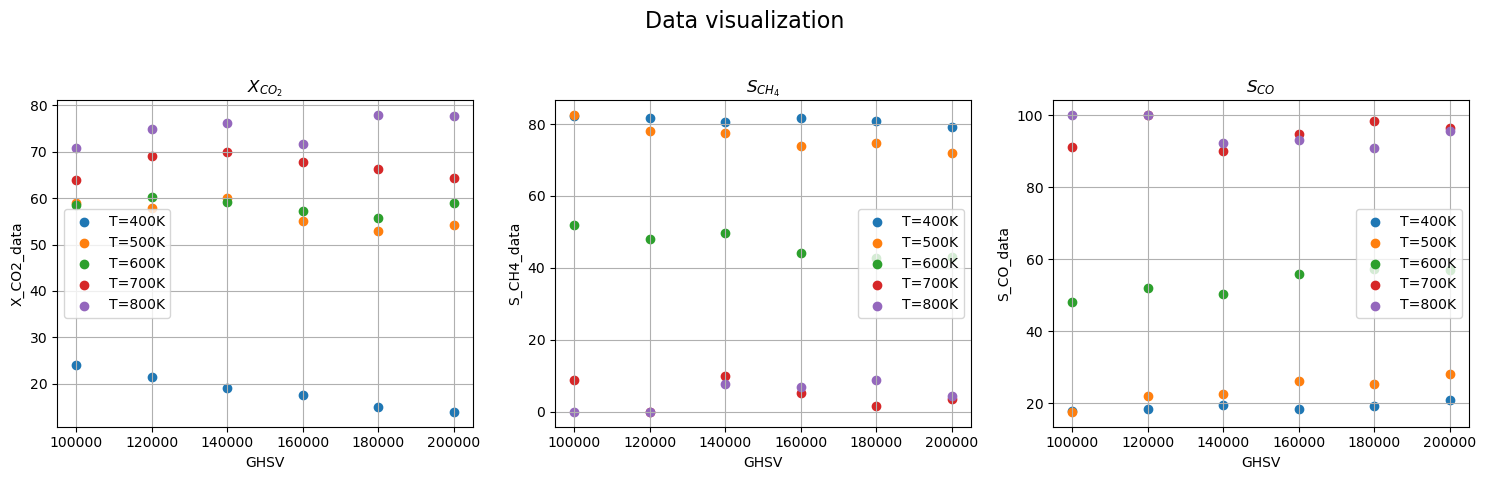

In [6]:
''' RWGS kinetic model 예제 '''
from scipy.integrate import solve_ivp

# Load data
df4 = pd.read_csv('example3.csv')

# Data visualization
Temp_data = df4['T'].unique()
GHSV_data = df4['GHSV'].unique()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
metrics = ['X_CO2_data', 'S_CH4_data', 'S_CO_data']
titles = [r'$X_{CO_2}$', r'$S_{CH_4}$', r'$S_{CO}$']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i]
    for t in Temp_data:
        subset = df4[df4['T'] == t]
        ax.scatter(subset['GHSV'], subset[metric], label=f"T={t}K")
    ax.set_title(title)
    ax.set_xlabel("GHSV")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

fig.suptitle("Data visualization", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
# Geometry & Catalyst loading
L = 2 # cm (catalyst bed length)
ID = 0.6 # cm (tube inner diameter)
A = np.pi*ID**2/4 # cm2 (cross-sectional area)

wcat = 0.62 # g (catalyst weight)
Vcat = A*L # mL (catalyst volume)
rho_cat = wcat/Vcat # g/mL (catalyst density)
m_content = 0.02 # active metal content in catalyst

# Operating conditions
GHSV = df4['GHSV'] # mL/g/h
T = df4['T'] # degC
P = 1.01325 # bar (Total pressure, ignore pressure drop)
zCO2 = 0.25; zH2 = 0.75 # Feed composition

# Data treatment
df_tr = pd.DataFrame(GHSV, columns=['GHSV'])
df_tr['T'] = T
df_tr['Q'] = GHSV * wcat / 3600 # mL/s (volumetric flow rate)
df_tr['Fi_tot'] = df_tr['Q'] * P / (83.14 * (T + 273.15)) # mol/s (total molar flow rate)
df_tr['Fi_CO2'] = df_tr['Fi_tot'] * zCO2 # mol/s (CO2 inlet molar flow rate)
df_tr['Fi_H2'] = df_tr['Fi_tot'] * zH2 # mol/s (H2 inlet molar flow rate)
df_tr['Fi_CO'] = 1e-10 # mol/s (CO inlet molar flow rate, avoid zero division)
df_tr['Fi_CH4'] = 1e-10 # mol/s (CH4 inlet molar flow rate, avoid zero division)
df_tr['Fi_H2O'] = 1e-10 # mol/s (H2O inlet molar flow rate, avoid zero division)
df_tr['Fo_CO2'] = df_tr['Fi_CO2']*(1 - df4['X_CO2_data']/100) # mol/s (CO2 outlet molar flow rate)
df_tr['Fo_CO'] = df_tr['Fi_CO2']*df4['X_CO2_data']/100*df4['S_CO_data']/100 # mol/s (CO outlet molar flow rate)
df_tr['Fo_CH4'] = df_tr['Fi_CO2']*df4['X_CO2_data']/100*df4['S_CH4_data']/100 # mol/s (CH4 outlet molar flow rate)
df_tr['Fo_H2'] = df_tr['Fi_H2'] - df_tr['Fo_CO'] - 4*df_tr['Fo_CH4'] # mol/s (H2 outlet molar flow rate)
df_tr['Fo_H2O'] = df_tr['Fo_CO'] + 2*df_tr['Fo_CH4'] # mol/s (H2O outlet molar flow rate)

print('Treated data')
display(df_tr)



Treated data


,GHSV,T,Q,Fi_tot,Fi_CO2,Fi_H2,Fi_CO,Fi_CH4,Fi_H2O,Fo_CO2,Fo_CO,Fo_CH4,Fo_H2,Fo_H2O
0,100000,400,17.222222,0.000312,0.000078,0.000234,1.000000e-10,1.000000e-10,1.000000e-10,0.000059,0.000003,1.545649e-05,0.000169,0.000034
1,120000,400,20.666667,0.000374,0.000094,0.000281,1.000000e-10,1.000000e-10,1.000000e-10,0.000073,0.000004,1.645346e-05,0.000211,0.000037
2,140000,400,24.111111,0.000437,0.000109,0.000327,1.000000e-10,1.000000e-10,1.000000e-10,0.000088,0.000004,1.684638e-05,0.000256,0.000038
3,160000,400,27.555556,0.000499,0.000125,0.000374,1.000000e-10,1.000000e-10,1.000000e-10,0.000103,0.000004,1.782195e-05,0.000299,0.000040
4,180000,400,31.000000,0.000561,0.000140,0.000421,1.000000e-10,1.000000e-10,1.000000e-10,0.000119,0.000004,1.694421e-05,0.000349,0.000038
5,200000,400,34.444444,0.000624,0.000156,0.000468,1.000000e-10,1.000000e-10,1.000000e-10,0.000134,0.000005,1.721861e-05,0.000394,0.000039
6,100000,500,17.222222,0.000271,0.000068,0.000204,1.000000e-10,1.000000e-10,1.000000e-10,0.000028,0.000007,3.300498e-05,0.000065,0.000073
7,120000,500,20.666667,0.000326,0.000081,0.000244,1.000000e-10,1.000000e-10,1.000000e-10,0.000034,0.000010,3.674124e-05,0.000087,0.000084
8,140000,500,24.111111,0.000380,0.000095,0.000285,1.000000e-10,1.000000e-10,1.000000e-10,0.000038,0.000013,4.421474e-05,0.000095,0.000101
9,160000,500,27.555556,0.000434,0.000109,0.000326,1.000000e-10,1.000000e-10,1.000000e-10,0.000049,0.000016,4.422697e-05,0.000133,0.000104


In [8]:
## Check atomic balance
df_ck = pd.DataFrame()
df_ck['Ci'] = df_tr['Fi_CO2']
df_ck['Hi'] = 2*df_tr['Fi_H2']
df_ck['Oi'] = 2*df_tr['Fi_CO2']
df_ck['Co'] = df_tr['Fo_CO2'] + df_tr['Fo_CO'] + df_tr['Fo_CH4']
df_ck['Ho'] = 2*df_tr['Fo_H2'] + 2*df_tr['Fo_H2O'] + 4*df_tr['Fo_CH4']
df_ck['Oo'] = 2*df_tr['Fo_CO2'] + df_tr['Fo_CO'] + df_tr['Fo_H2O']
df_ck['C_balance'] = np.where(np.abs(df_ck['Co'] - df_ck['Ci']) < 1e-10, 'ok', 'unbalanced')
df_ck['H_balance'] = np.where(np.abs(df_ck['Ho'] - df_ck['Hi']) < 1e-10, 'ok', 'unbalanced')
df_ck['O_balance'] = np.where(np.abs(df_ck['Oo'] - df_ck['Oi']) < 1e-10, 'ok', 'unbalanced')

print('Check atomic balance')
display(df_ck)

Check atomic balance


,Ci,Hi,Oi,Co,Ho,Oo,C_balance,H_balance,O_balance
0,0.000078,0.000468,0.000156,0.000078,0.000468,0.000156,ok,ok,ok
1,0.000094,0.000561,0.000187,0.000094,0.000561,0.000187,ok,ok,ok
2,0.000109,0.000655,0.000218,0.000109,0.000655,0.000218,ok,ok,ok
3,0.000125,0.000748,0.000249,0.000125,0.000748,0.000249,ok,ok,ok
4,0.000140,0.000842,0.000281,0.000140,0.000842,0.000281,ok,ok,ok
5,0.000156,0.000935,0.000312,0.000156,0.000935,0.000312,ok,ok,ok
6,0.000068,0.000407,0.000136,0.000068,0.000407,0.000136,ok,ok,ok
7,0.000081,0.000489,0.000163,0.000081,0.000489,0.000163,ok,ok,ok
8,0.000095,0.000570,0.000190,0.000095,0.000570,0.000190,ok,ok,ok
9,0.000109,0.000652,0.000217,0.000109,0.000652,0.000217,ok,ok,ok


In [9]:
# ODE for PFR model
def pfr_model(z, F, T, k):
    F_total = np.sum(F)
    pP = F / F_total * P # partial pressure (bar)

    TK = T + 273.15 # Absolute temperature (K)

    # Kinetic parameters
    kMTN = k[0] * np.exp(-k[3] / (0.008314 * TK))
    kRWGS = k[1] * np.exp(-k[4] / (0.008314 * TK))
    kOTN = k[2] * np.exp(-k[5] / (0.008314 * TK))
    
    # Adsorption equilibrium constants
    KCO = k[6] * np.exp(k[10] / (0.008314 * TK))
    KH2O = k[7] * np.exp(k[11] / (0.008314 * TK))
    KCO2 = k[8] * np.exp(k[12] / (0.008314 * TK))
    KH2 = k[9] * np.exp(k[13] / (0.008314 * TK))

    den = 1 + KCO2 * pP[0] + KH2 * pP[1] + KH2O * pP[4] + KCO * pP[2]

    # Reaction equilibrium constants
    Keq_MTN = np.exp(29.72969 + 0.002703 * TK + 17791.69 / TK - 7.7973 * np.log(TK))
    Keq_RWGS = np.exp(13.64981 + 2.80537e-5 * TK - 5214.4 / TK - 1.2507 * np.log(TK))
    Keq_OTN = np.exp(16.07987 + 0.002675 * TK + 23204.1 / TK - 6.0746 * np.log(TK))

    # Kinetic model (mol/g/s)
    rMTN = m_content * kMTN * KH2 * KCO2 * pP[1] * (1 - pP[3] * pP[4]**2 / pP[1]**4 / pP[0] / Keq_MTN) / den**2
    rRWGS = m_content * kRWGS * KCO2 * pP[0] * (1 - pP[2] * pP[4] / pP[1] / pP[0] / Keq_RWGS) / den
    rOTN = m_content * kOTN * KH2 * KCO * pP[1] * pP[2] * (1 - pP[3] * pP[4] / pP[1]**3 / pP[2] / Keq_OTN) / den**2

    # Mass balance
    # dF/dz = rho_cat * A * r (mol/s* 1/cm = g/cm3 * cm2 * mol/g/s => mol/cm/s)
    # CO2 methanation (MTN): CO2 + 4H2 -> CH4 + 2H2O
    # RWGS: CO2 + H2 -> CO + H2O
    # CO methanation (OTN): CO + 3H2 -> CH4 + H2O

    dFdz = np.zeros(5)
    dFdz[0] = rho_cat * A * (-rMTN - rRWGS)           # CO2
    dFdz[1] = rho_cat * A * (-4*rMTN - rRWGS - 3*rOTN) # H2
    dFdz[2] = rho_cat * A * (rRWGS - rOTN)             # CO
    dFdz[3] = rho_cat * A * (rMTN + rOTN)              # CH4
    dFdz[4] = rho_cat * A * (2*rMTN + rRWGS + rOTN)    # H2O

    return dFdz

In [10]:
# Integration
def solve_ode(k, df_ode):
    z_span = (0, L) # reactor length from 0 to L
    z_eval = np.linspace(0, L, 100) # evaluation points

    F0 = [df_ode['Fi_CO2'],df_ode['Fi_H2'],df_ode['Fi_CO'],df_ode['Fi_CH4'],df_ode['Fi_H2O']]
    T = df_ode['T']
    sol = solve_ivp(
        fun = lambda z, F: pfr_model(z, F, T, k),
        t_span = z_span,
        y0 = F0,
        t_eval = z_eval,
        method = 'Radau',
    )
    return sol.y

In [ ]:
# Objective function
def obj1(x, *p):
    p = np.array(p)
    #k0 = np.array([1.14e8/60, 1.78e6/60, 2.23e8/60, 110, 97.1, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52])
    k0 = np.ones(14)
    k = 10**p*k0
    y_pred = []

    for i in range(len(df_tr)):
        sol = solve_ode(k, df_tr.iloc[i])[:,-1]
        y_pred.extend(sol) # 1차원으로 나열열
    res = 1e6*np.array([y_pred])[0]
    return res

In [ ]:
# Parameter estimation
import json
k0 = np.ones(14)
y_data = []
for i in range(len(df_tr)):
    y_data.extend(df_tr.iloc[i][['Fo_CO2','Fo_H2','Fo_CO','Fo_CH4','Fo_H2O']])
y_data = 1e6*np.array([y_data])[0]

x_dummy = np.arange(len(y_data))
p0 = np.zeros(14)
bnds = (np.ones(14)*-10, np.ones(14)*10)

best_loss = np.inf
best_x = p0
for i in range(10):
    popt, _ = curve_fit(obj1, x_dummy, y_data, p0=p0, bounds=bnds)
    loss = np.sum((obj1(x_dummy, *popt) - y_data)**2)
    print(f'Iteration {i+1}: Loss = {loss:.10f}, best loss = {best_loss:.10f}')
    if loss < best_loss:
        best_loss = loss
        best_x = popt
        with open('best_x.json', 'w') as f:
            json.dump(best_x.tolist(), f)
    
    p0 = best_x * (1 + np.random.uniform(-0.2, 0.2, len(best_x))) # normal distribution을 하면 가끔씩 절대값이 너무 큰 값을 반환하여 문제가 생길 수 있음음

print(f'Estimated parameters: {k0*10**best_x}')
print(f'True parameters: {[1.14e8/60, 1.78e6/60, 2.23e8/60, 110, 97.1, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52]}')

Iteration 1: Loss = 2717.3423755981, best loss = inf
Iteration 2: Loss = 2723.0911803981, best loss = 2717.3423755981
Iteration 3: Loss = 2661.9146653249, best loss = 2717.3423755981
Iteration 4: Loss = 2672.2308738462, best loss = 2661.9146653249
Iteration 5: Loss = 2636.0084156119, best loss = 2661.9146653249
Iteration 6: Loss = 2648.7363936207, best loss = 2636.0084156119
Iteration 7: Loss = 2639.8719111852, best loss = 2636.0084156119
Iteration 8: Loss = 2655.7415546393, best loss = 2636.0084156119
Iteration 9: Loss = 2618.8939671270, best loss = 2636.0084156119
Iteration 10: Loss = 2627.7907356885, best loss = 2618.8939671270
Estimated parameters: [4.46247816e+05 7.87569579e+05 2.34075112e+04 9.79093173e+01
 1.06348607e+02 6.63409670e+02 2.96552983e-01 1.99513046e+00
 2.96193924e-01 4.23620819e-01 6.95423467e+00 1.30068803e+01
 7.33383809e+00 8.37174940e+00]
True parameters: [1900000.0, 29666.666666666668, 3716666.6666666665, 110, 97.1, 97.3, 0.00239, 0.609, 1.07, 5.2e-05, 40.6, 1

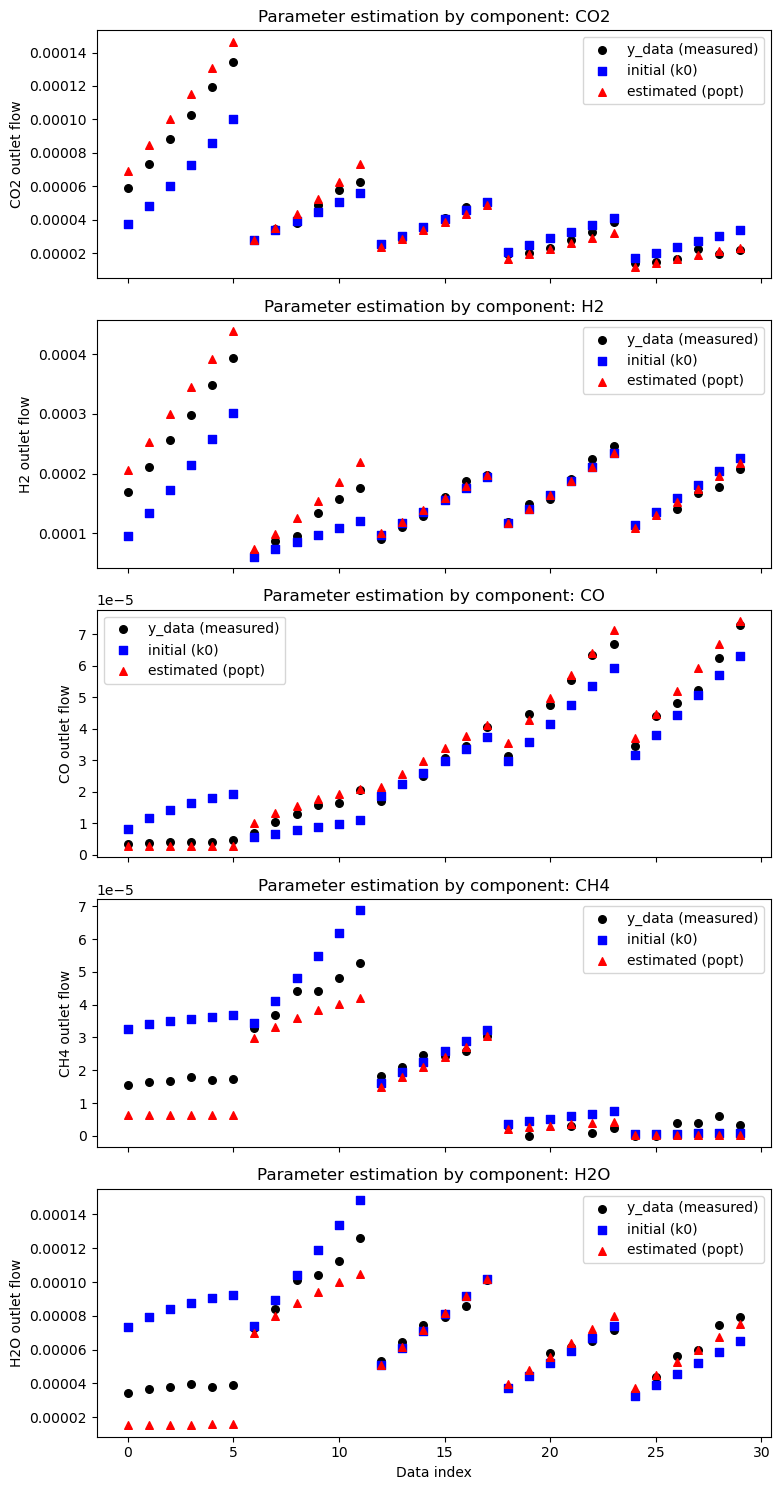

In [ ]:
species_list = ['CO2', 'H2', 'CO', 'CH4', 'H2O']
n_species = len(species_list)
n_exp = len(df_tr)

#k0 = np.array([1.14e8/60, 1.78e6/60, 2.23e8/60, 110, 97.1, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52])
k0 = np.ones(14)
y_pred_k0 = []
for i in range(n_exp):
    sol = solve_ode(k0, df_tr.iloc[i])[:,-1]
    y_pred_k0.append(sol)  # shape: (n_exp, n_species)
y_pred_k0 = np.array(y_pred_k0)  # shape: (n_exp, n_species)

k_popt = 10**best_x * np.array(k0)
y_pred_popt = []
for i in range(n_exp):
    sol = solve_ode(k_popt, df_tr.iloc[i])[:,-1]
    y_pred_popt.append(sol)
y_pred_popt = np.array(y_pred_popt)

y_data_mat = []
for i in range(n_exp):
    y_data_mat.append(df_tr.iloc[i][['Fo_CO2','Fo_H2','Fo_CO','Fo_CH4','Fo_H2O']].values)
y_data_mat = np.array(y_data_mat)

fig, axs = plt.subplots(n_species, 1, figsize=(8, n_species*3), sharex=True)
for idx, sp in enumerate(species_list):
    axs[idx].scatter(range(n_exp), y_data_mat[:,idx], color='black', label='y_data (measured)', s=30)
    axs[idx].scatter(range(n_exp), y_pred_k0[:,idx], color='blue', label='initial (k0)', s=30, marker='s')
    axs[idx].scatter(range(n_exp), y_pred_popt[:,idx], color='red', label='estimated (popt)', s=30, marker='^')
    axs[idx].set_ylabel(f"{sp} outlet flow")
    axs[idx].legend()
    axs[idx].set_title(f'Parameter estimation by component: {sp}')

plt.xlabel('Data index')
plt.tight_layout()
plt.show()


Iteration 1: Loss = 2682.3323626036, best loss = inf
Iteration 2: Loss = 2709.2088766599, best loss = 2682.3323626036
Iteration 3: Loss = 2611.3605119606, best loss = 2682.3323626036
Iteration 4: Loss = 2552.5952184685, best loss = 2611.3605119606
Iteration 5: Loss = 2583.0453199374, best loss = 2552.5952184685
Iteration 6: Loss = 2529.8519382442, best loss = 2552.5952184685
Iteration 7: Loss = 2507.9344984258, best loss = 2529.8519382442
Iteration 8: Loss = 2515.3571410057, best loss = 2507.9344984258
Iteration 9: Loss = 2491.2402268907, best loss = 2507.9344984258
Iteration 10: Loss = 2505.1717399112, best loss = 2491.2402268907
Estimated parameters: [5.19283550e+05 3.21845247e+07 5.24419865e+05 9.01623349e+01
 1.40447857e+02 9.79458991e+01 1.09962735e+00 1.58791543e+00
 7.06157289e-01 6.09262676e-03 5.78249960e+01 3.41414067e+01
 4.25550187e+01 5.93368844e+01]
True parameters: [1900000.0, 29666.666666666668, 3716666.6666666665, 110, 97.1, 97.3, 0.00239, 0.609, 1.07, 5.2e-05, 40.6, 1

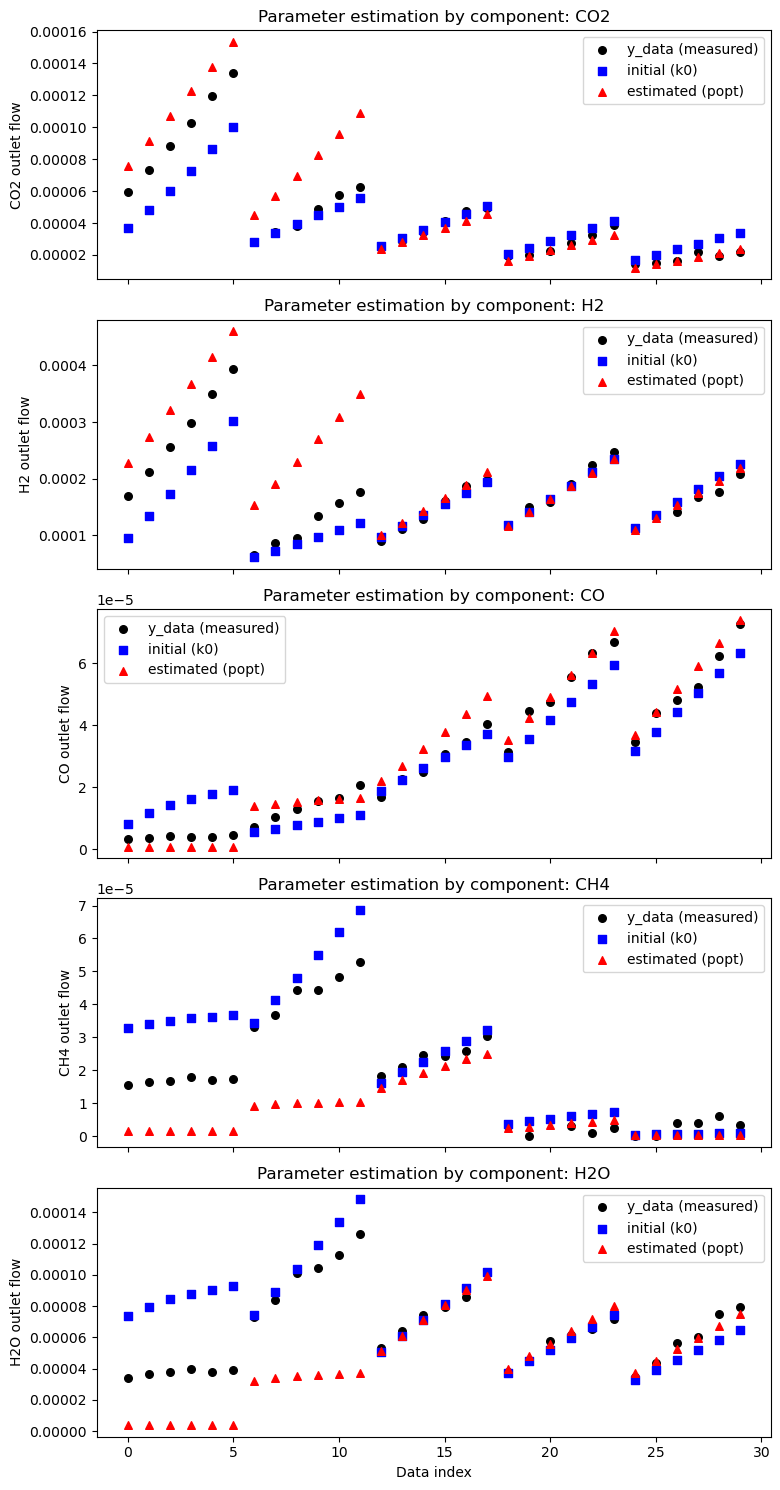

In [ ]:
# Objective function
def obj2(x, *p):
    p = np.array(p)
    k0 = np.array([1e6, 1e6, 1e6, 1e2, 1e2, 1e2, 1, 1, 1, 1, 50, 50, 50, 50])
    k = 10**p*k0
    y_pred = []

    for i in range(len(df_tr)):
        sol = solve_ode(k, df_tr.iloc[i])[:,-1]
        y_pred.extend(sol) # 1차원으로 나열열
    res = 1e6*np.array([y_pred])[0]
    return res

# Parameter estimation
import json
k0 = np.array([1e6, 1e6, 1e6, 1e2, 1e2, 1e2, 1, 1, 1, 1, 50, 50, 50, 50])
y_data = []
for i in range(len(df_tr)):
    y_data.extend(df_tr.iloc[i][['Fo_CO2','Fo_H2','Fo_CO','Fo_CH4','Fo_H2O']])
y_data = 1e6*np.array([y_data])[0]

x_dummy = np.arange(len(y_data))
p0 = np.zeros(14)
bnds = ([-3,-3,-3,-1,-1,-1,-6,-6,-6,-6,-2,-2,-2,-2],[3,3,3,0.5,0.5,0.5,3,3,3,3,1,1,1,1])

best_loss = np.inf
best_x = p0
for i in range(10):
    popt, _ = curve_fit(obj2, x_dummy, y_data, p0=p0, bounds=bnds)
    loss = np.sum((obj2(x_dummy, *popt) - y_data)**2)
    print(f'Iteration {i+1}: Loss = {loss:.10f}, best loss = {best_loss:.10f}')
    if loss < best_loss:
        best_loss = loss
        best_x = popt
        with open('best_x.json', 'w') as f:
            json.dump(best_x.tolist(), f)
    
    p0 = best_x * (1 + np.random.uniform(-0.2, 0.2, len(best_x))) # normal distribution을 하면 가끔씩 절대값이 너무 큰 값을 반환하여 문제가 생길 수 있음음

print(f'Estimated parameters: {k0*10**best_x}')
print(f'True parameters: {[1.14e8/60, 1.78e6/60, 2.23e8/60, 110, 97.1, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52]}')

species_list = ['CO2', 'H2', 'CO', 'CH4', 'H2O']
n_species = len(species_list)
n_exp = len(df_tr)

# y_pred with k0 (초기값)
#k0 = np.array([1.14e8/60, 1.78e6/60, 2.23e8/60, 110, 97.1, 97.3, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52])
k0 = np.array([1e6, 1e6, 1e6, 1e2, 1e2, 1e2, 1, 1, 1, 1, 50, 50, 50, 50])
y_pred_k0 = []
for i in range(n_exp):
    sol = solve_ode(k0, df_tr.iloc[i])[:,-1]
    y_pred_k0.append(sol)  # shape: (n_exp, n_species)
y_pred_k0 = np.array(y_pred_k0)  # shape: (n_exp, n_species)

# y_pred with best_x (추정값)
k_popt = 10**best_x * np.array(k0)
y_pred_popt = []
for i in range(n_exp):
    sol = solve_ode(k_popt, df_tr.iloc[i])[:,-1]
    y_pred_popt.append(sol)
y_pred_popt = np.array(y_pred_popt)

# y_data shape 변환 (실측값)
y_data_mat = []
for i in range(n_exp):
    y_data_mat.append(df_tr.iloc[i][['Fo_CO2','Fo_H2','Fo_CO','Fo_CH4','Fo_H2O']].values)
y_data_mat = np.array(y_data_mat)

# 성분별 출력
fig, axs = plt.subplots(n_species, 1, figsize=(8, n_species*3), sharex=True)
for idx, sp in enumerate(species_list):
    axs[idx].scatter(range(n_exp), y_data_mat[:,idx], color='black', label='y_data (measured)', s=30)
    axs[idx].scatter(range(n_exp), y_pred_k0[:,idx], color='blue', label='initial (k0)', s=30, marker='s')
    axs[idx].scatter(range(n_exp), y_pred_popt[:,idx], color='red', label='estimated (popt)', s=30, marker='^')
    axs[idx].set_ylabel(f"{sp} outlet flow")
    axs[idx].legend()
    axs[idx].set_title(f'Parameter estimation by component: {sp}')

plt.xlabel('Data index')
plt.tight_layout()
plt.show()
